In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
num_data = 3000
x1 = np.random.rand(num_data) *10
x2 = np.random.rand(num_data) *10
e = np.random.normal(0, 0.8, num_data)
X= np.array([x1,x2]).T  # T for transpose from (2, 2400) to (2400, 2)
y=2*np.sin(x1) + np.log(0.5*x2**2)+e

In [ ]:
train_X, train_y = X[:2000, :], y[:2000]
val_X, val_y = X[2000:2500, :], y[2000:2500]
test_X, test_y = X[2500:, :], y[2500:]

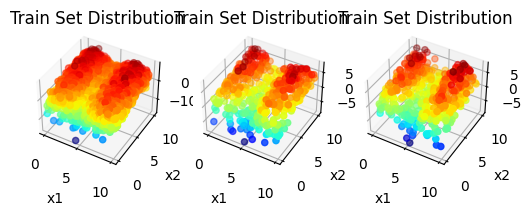

In [ ]:
fig = plt.figure(figsize=(6,3))

ax1 = fig.add_subplot(1, 3, 1, projection='3d') # size 1 row, 3 col, location 1
ax1.scatter(train_X[:, 0], train_X[:,1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.view_init(40, -60) #view angle

ax2 = fig.add_subplot(1, 3, 2, projection='3d') # size 1 row, 3 col, location 2
ax2.scatter(val_X[:, 0], val_X[:,1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Train Set Distribution')
ax2.view_init(40, -60) #view angle


ax3 = fig.add_subplot(1, 3, 3, projection='3d') # size 1 row, 3 col, location 3
ax3.scatter(test_X[:, 0], test_X[:,1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Train Set Distribution')
ax3.view_init(40, -60) #view angle

plt.show()

## **Model(Hypothesis) Define**

In [ ]:
import tensorflow as tf

In [ ]:
input_shape = (2,)

In [ ]:

tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])


In [ ]:
# Configure the model and start training
# Configure the model and start training

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss='mean_absolute_error', optimizer= optimizer, metrics=['mean_squared_error'])
history = model.fit(train_X, train_y, epochs=100, batch_size=5, verbose=1, validation_data=(val_X, val_y))
 

Epoch 1/100
400/400 [==============================] - 2s 2ms/step - loss: 0.7099 - mean_squared_error: 0.8585 - val_loss: 0.6702 - val_mean_squared_error: 0.7053
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7098 - mean_squared_error: 0.8596 - val_loss: 0.6704 - val_mean_squared_error: 0.7048
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.7100 - mean_squared_error: 0.8592 - val_loss: 0.6729 - val_mean_squared_error: 0.7074
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 0.7092 - mean_squared_error: 0.8581 - val_loss: 0.6745 - val_mean_squared_error: 0.7094
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 0.7097 - mean_squared_error: 0.8590 - val_loss: 0.6702 - val_mean_squared_error: 0.7051
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 0.7093 - mean_squared_error: 0.8606 - val_loss: 0.6701 - val_mean_squared_error: 0.7058
Epoch 7/100
400/400 [=

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                30        
                                                                 
 dense_30 (Dense)            (None, 5)                 55        
                                                                 
 dense_31 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


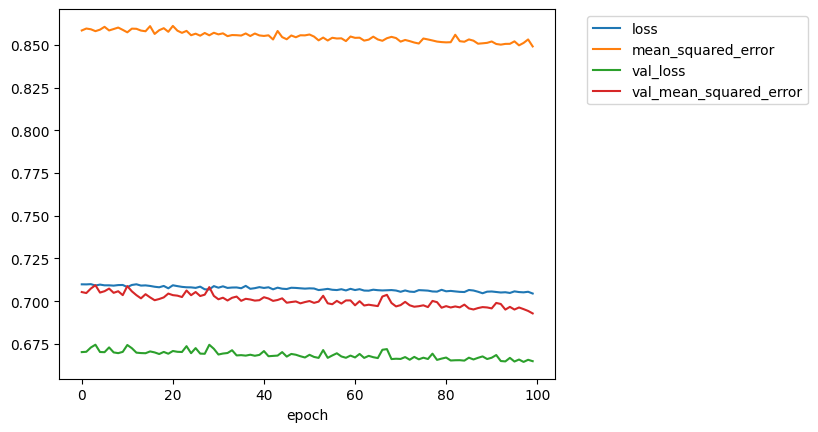

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [ ]:
mse_test, rmse_test = model.evaluate(test_X, test_y)
y_pred = model.predict(test_X)

16/16 [==============================] - 0s 1ms/step


In [ ]:
pd.DataFrame({
    'test_y':test_y,
    'y_pred':model.predict(test_X).ravel()
}
).T

16/16 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
test_y,3.155547,1.191602,1.903611,1.370813,1.948378,-2.953283,4.889725,2.840443,1.853517,1.590322,...,-1.048223,0.878492,1.669062,1.947316,4.694666,4.396562,1.372354,2.854980,3.778301,-0.224873
y_pred,3.355164,0.991526,1.787237,1.623200,2.149848,-0.677098,3.961944,3.553998,0.961569,3.027300,...,-0.091489,1.248863,3.073605,2.037406,4.486881,3.821113,3.059129,3.308224,4.205225,1.430794
